In [2]:
# pip install cvxpy

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cvxpy as cvx
import pandas as pd

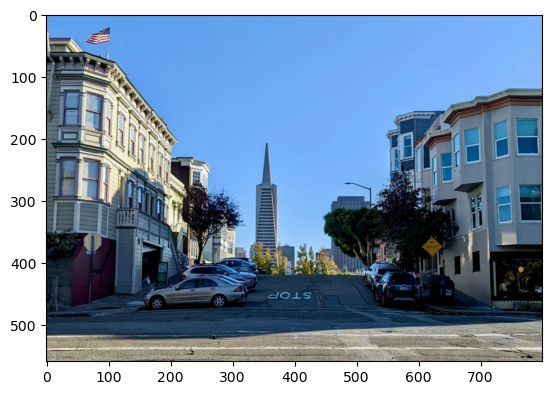

In [3]:
im=plt.imread('sfo.png')
plt.imshow(im)

In [4]:
im.shape


(559, 800, 4)

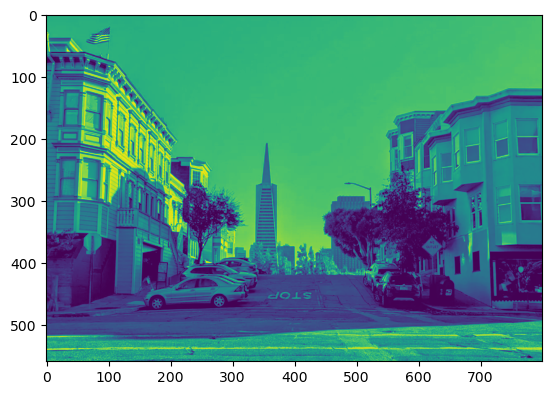

In [5]:
plt.imshow(im[:,:,1])

In [6]:
im3=im[:,:,:3]

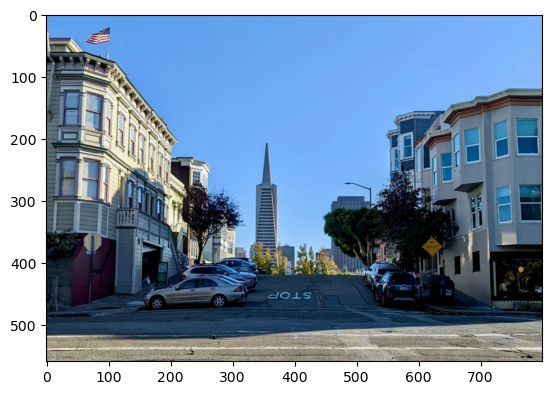

In [7]:
plt.imshow(im3)

In [8]:
im2=im3[:,:,2]

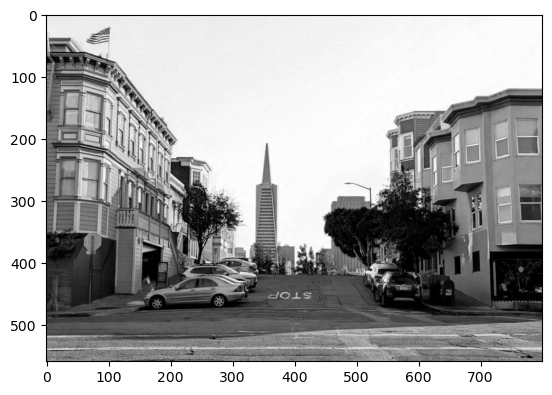

In [9]:
plt.imshow(im2,cmap=plt.cm.gray)

In [10]:
U,s,Vh=sp.linalg.svd(im2,full_matrices=False)

In [11]:
U.shape

(559, 559)

In [12]:
s.shape

(559,)

In [13]:
Vh.shape

(559, 800)

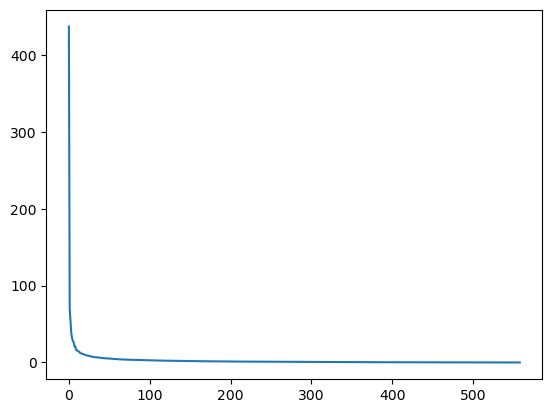

In [14]:
plt.plot(s)

([<matplotlib.lines.Line2D at 0x2cb883634d0>], None)

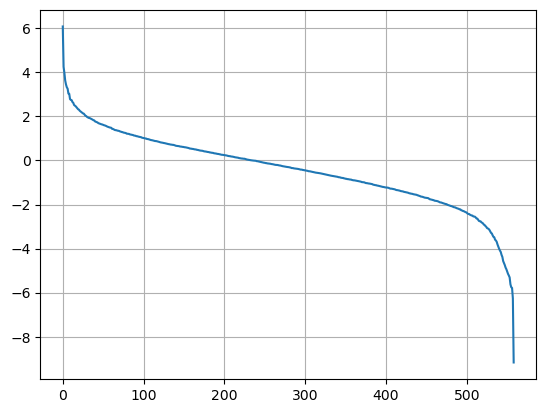

In [15]:
plt.plot(np.log(s)),plt.grid()

In [16]:
s.max()

437.1423

In [17]:
type(s)


numpy.ndarray

In [18]:
r=[15,30,70,100,200,260]

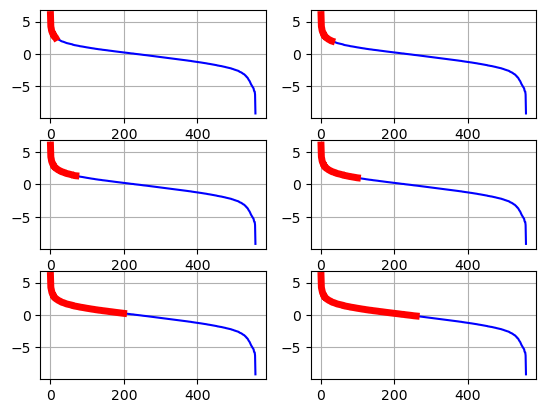

In [19]:
for i in range(len(r)):
    plt.subplot(321+i)
    plt.plot(np.log(s),'b-')
    plt.plot(np.log(s[:r[i]]),'r-',lw=5)
    plt.grid()

Text(0.5, 1.0, 'The compression rate is: 0.045583631484794274')

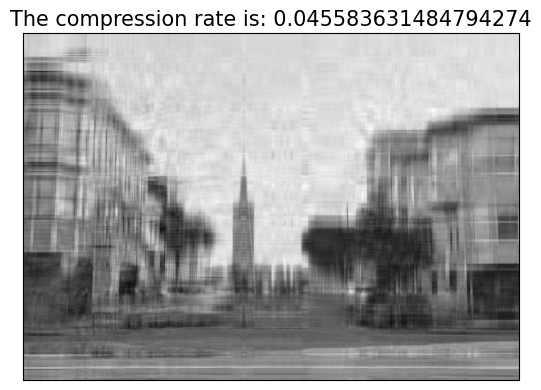

In [20]:
i=0
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {cr}',fontsize=15)

Text(0.5, 1.0, 'The compression rate is: 0.091')

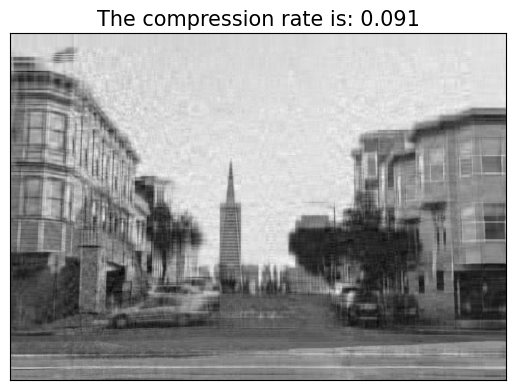

In [21]:
i=1
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {round(cr,3)}',fontsize=15)

Text(0.5, 1.0, 'The compression rate is: 0.213')

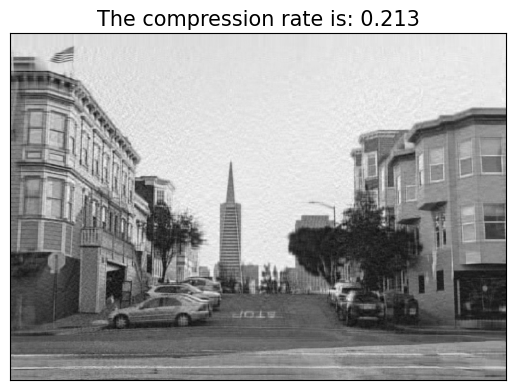

In [22]:
i=2
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {round(cr,3)}',fontsize=15)

Text(0.5, 1.0, 'The compression rate is: 0.304')

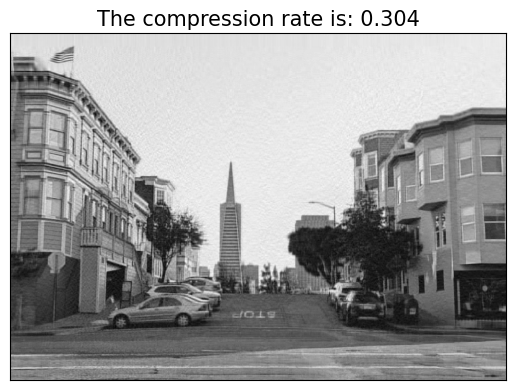

In [23]:
i=3
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {round(cr,3)}',fontsize=15)

Text(0.5, 1.0, 'The compression rate is: 0.608')

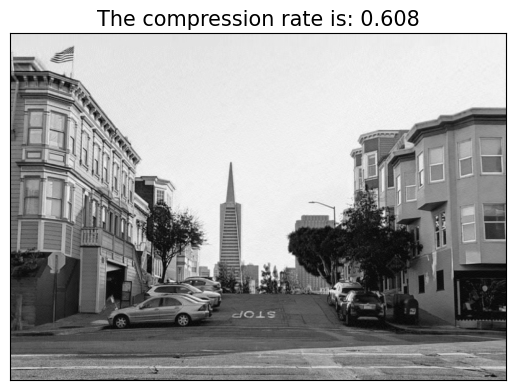

In [24]:
i=4
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {round(cr,3)}',fontsize=15)

Text(0.5, 1.0, 'The compression rate is: 0.79')

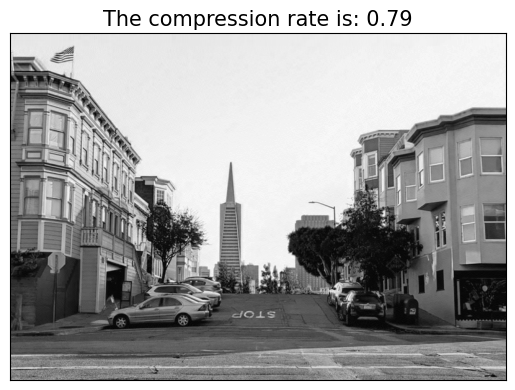

In [25]:
i=5
S=s.copy()
S[r[i]:]=0
S=np.diag(S)
imReconstructed=U@S@Vh
plt.imshow(imReconstructed,cmap='gray')
cr=r[i]*(im2.shape[0]+im2.shape[1])/(im2.shape[0]*im2.shape[1])
plt.xticks([]),plt.yticks([])
plt.title(f'The compression rate is: {round(cr,3)}',fontsize=15)

In [26]:
# ======== Linear Programming ===========

In [27]:
c=np.array([-1,4])
A=np.array([-3,1,1,2,0,-1]).reshape(3,2)
b=np.array([6,4,3])
bounds=np.array([None]*4).reshape(2,2)
ans=sp.optimize.linprog(c,A,b,bounds=bounds)



In [28]:
ans.fun

-22.0

In [29]:
ans.x

array([10., -3.])

In [30]:
ans

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -22.0
              x: [ 1.000e+01 -3.000e+00]
            nit: 0
          lower:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 3.900e+01  0.000e+00  0.000e+00]
                 marginals: [-0.000e+00 -1.000e+00 -6.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# -3x+y<=6, x+2y <=4, -y<=3,  
# x is 70, y is 50, z is 60 each piece. for max money 
# 2x+4y+3z<=150, 3x+y+5z<=160, 7x+3y+5z<=200, x,y,z>=0


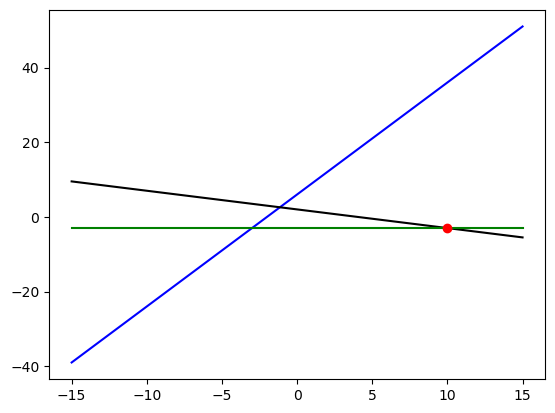

In [31]:
x=np.linspace(-15,15,300)

plt.plot(x,3*x+6,'b-')
plt.plot(x,(4-x)/2,'k-')
plt.plot(x,-3*np.ones(len(x)),'g-')
plt.plot(ans.x[0],ans.x[1],'ro')

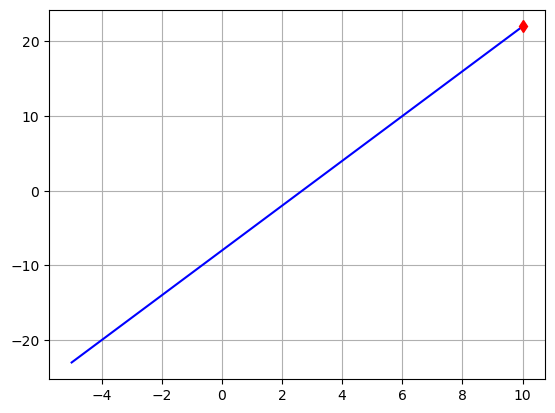

In [32]:
x=np.linspace(-5,10,300)
y=(4-x)/2
z=x-4*y
plt.plot(x,z,'b-')
plt.plot(ans.x[0],-ans.fun,'rd')
plt.grid()


In [4]:
c=-np.array([70,50,60])
A=np.array([2,4,3,3,1,5,7,3,5]).reshape(3,3)
b=np.array([150,160,200])


In [34]:
c

array([-70, -50, -60])

In [35]:
A

array([[2, 4, 3],
       [3, 1, 5],
       [7, 3, 5]])

In [36]:
b

array([150, 160, 200])

In [37]:
ans=sp.optimize.linprog(c,A,b)

In [38]:
ans.fun

-2590.909090909091

In [39]:
ans.x

array([ 2.12121212, 15.75757576, 27.57575758])

In [41]:
X=np.floor(ans.x).copy()

In [42]:
X

array([ 2., 15., 27.])

In [44]:
X1=[3,15,27]
X2=[2,16,27]
X3=[2,15,28]

In [45]:
A@X1, A@X2, A@X3

(array([147, 159, 201]), array([149, 157, 197]), array([148, 161, 199]))

In [46]:
X=X2.copy()

In [48]:
X  # final answer

[2, 16, 27]

In [49]:
-c.dot(X)  # final profit

2560

In [ ]:
# it is embarassing! The answer is not correct! 
# there is another global minimum. [15...., 29...., 0...]

In [50]:
X1=[15,29,0]
X2=[16,29,0]
X3=[16,30,0]
X4=[15,30,0]


In [51]:
A@X1, A@X2, A@X3, A@X4

(array([146,  74, 192]),
 array([148,  77, 199]),
 array([152,  78, 202]),
 array([150,  75, 195]))

In [52]:
-c.dot(X1),-c.dot(X2),-c.dot(X4)

(2500, 2570, 2550)

In [53]:
# the actual answer is 
X=X2.copy()
X

[16, 29, 0]

In [54]:
# the final profit is 
-c.dot(X)

2570

In [55]:
# ==== Another library====

In [6]:
X=cvx.Variable(3,integer=True)
X.shape

(3,)

In [7]:
c@X

Expression(AFFINE, UNKNOWN, ())

In [8]:
Xv=[t for t in X]

In [9]:
Xv

[Expression(AFFINE, UNKNOWN, ()),
 Expression(AFFINE, UNKNOWN, ()),
 Expression(AFFINE, UNKNOWN, ())]

In [10]:
obj=cvx.Maximize(-c@X)

In [11]:
cons=[(A@X)[i]<=b[i] for i in range(3)]+[X>=0]

In [12]:
problem=cvx.Problem(obj,cons)

In [13]:
# the maximum profit
problem.solve()

2570.0

In [14]:
# the final solution.
X.value

array([16., 29., -0.])

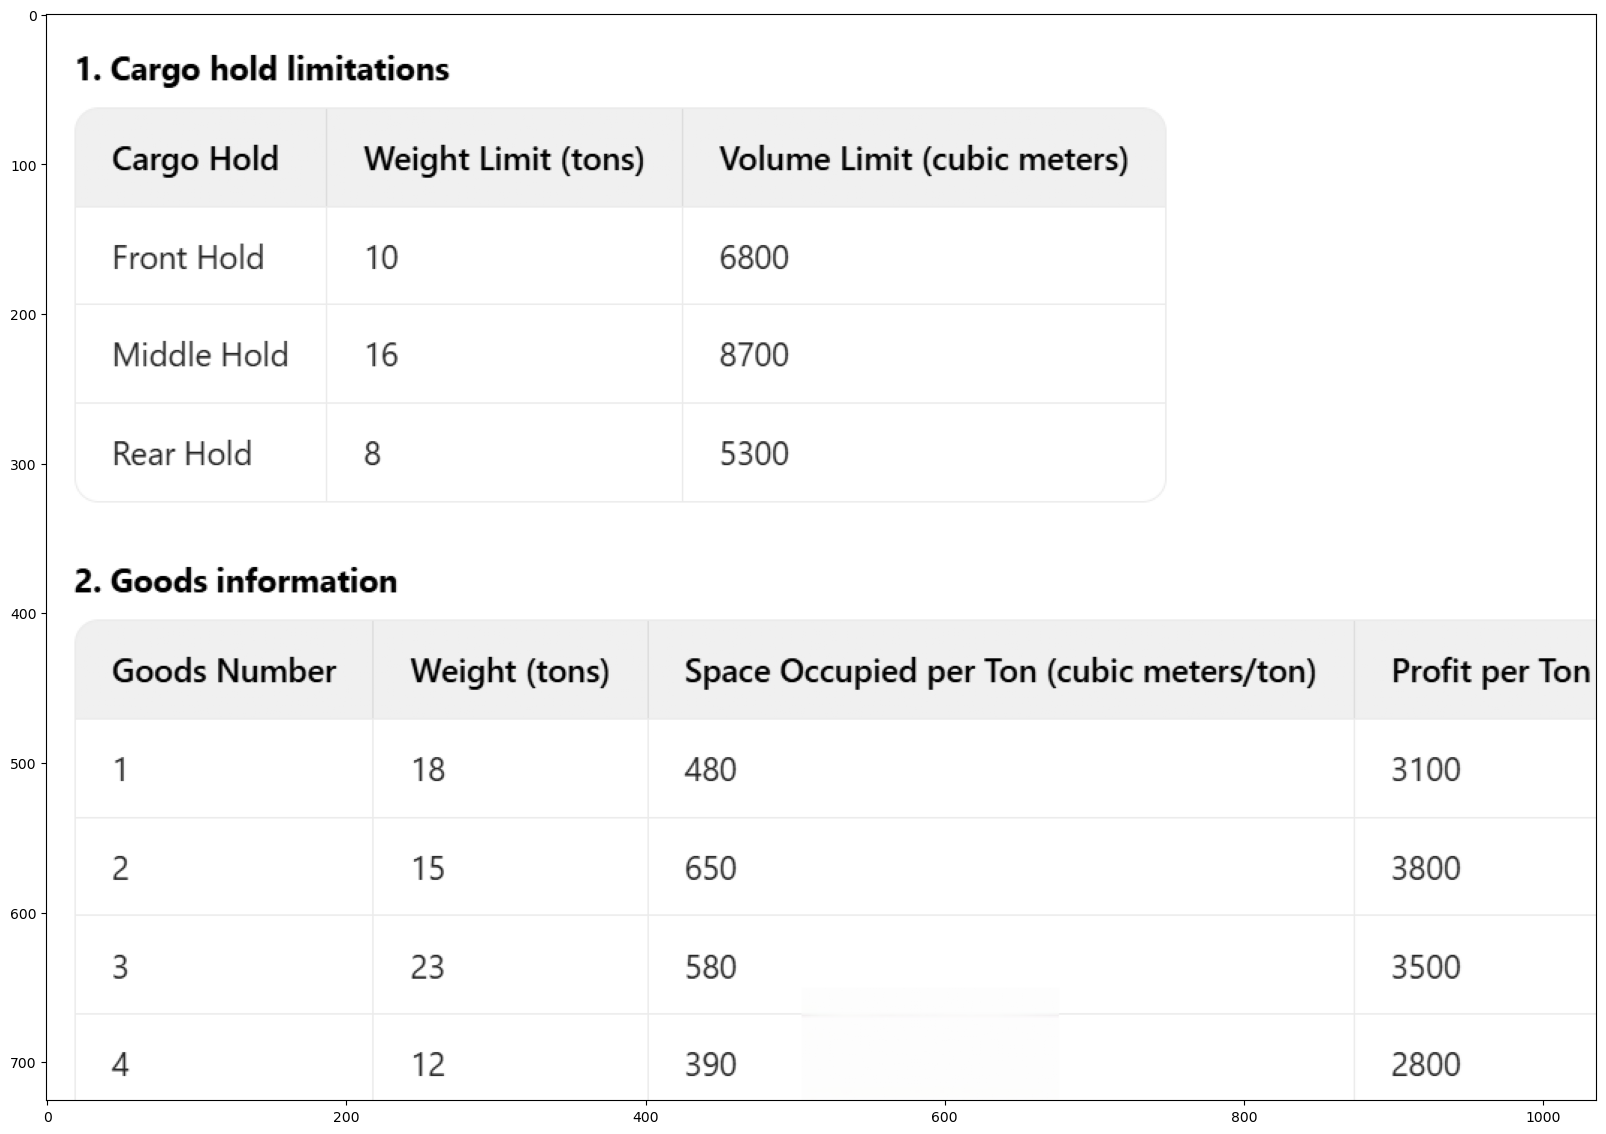

In [74]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('linearP.png'))

In [11]:
b=np.array([10,16,8,6800,8700,5300,18,15,23,12,])
b

array([  10,   16,    8, 6800, 8700, 5300,   18,   15,   23,   12])

In [12]:
a0=np.array([1,0,0]*4)
a0

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [13]:
A1=np.vstack((a0,np.roll(a0,1),np.roll(a0,2)))
A1

array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]])

In [14]:
s=[480,650,580,390]
S=np.repeat(s,3)
S

array([480, 480, 480, 650, 650, 650, 580, 580, 580, 390, 390, 390])

In [15]:
A2=A1*S
A2

array([[480,   0,   0, 650,   0,   0, 580,   0,   0, 390,   0,   0],
       [  0, 480,   0,   0, 650,   0,   0, 580,   0,   0, 390,   0],
       [  0,   0, 480,   0,   0, 650,   0,   0, 580,   0,   0, 390]])

In [16]:
a0=np.zeros(12)
a0[:3]=1
a0

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
A3=np.vstack((a0,np.roll(a0,3),np.roll(a0,6),np.roll(a0,9)))
A3

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [18]:
A=np.vstack((A1,A2,A3))
A

array([[  1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.],
       [  0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.],
       [  0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          1.],
       [480.,   0.,   0., 650.,   0.,   0., 580.,   0.,   0., 390.,   0.,
          0.],
       [  0., 480.,   0.,   0., 650.,   0.,   0., 580.,   0.,   0., 390.,
          0.],
       [  0.,   0., 480.,   0.,   0., 650.,   0.,   0., 580.,   0.,   0.,
        390.],
       [  1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.,
          0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.]])

In [19]:
b

array([  10,   16,    8, 6800, 8700, 5300,   18,   15,   23,   12])

In [20]:
# unit price
p=np.array([3100,3800,3500,2850])
c=np.repeat(p,3)
c

array([3100, 3100, 3100, 3800, 3800, 3800, 3500, 3500, 3500, 2850, 2850,
       2850])

In [21]:
ans=sp.optimize.linprog(-c,A,b)

In [22]:
ans.fun

-121515.7894736823

In [23]:
ans.x

array([ 0.        ,  0.        ,  0.        , 10.        ,  0.        ,
        5.        ,  0.        , 12.94736842,  3.        ,  0.        ,
        3.05263158,  0.        ])

In [24]:
# overLoading?
A1@ans.x

array([10., 16.,  8.])

In [25]:
# overVolume?
A2@ans.x

array([6500., 8700., 4990.])

In [26]:
# mass of each product
X=A3@ans.x
X

array([ 0.        , 15.        , 15.94736842,  3.05263158])

In [27]:
# money to make
p.dot(X)

121515.78947368231

In [28]:
# money to make , the other way
c.dot(ans.x)

121515.78947368232

In [29]:
loading=ans.x.copy().reshape(4,3)

In [30]:
loading

array([[ 0.        ,  0.        ,  0.        ],
       [10.        ,  0.        ,  5.        ],
       [ 0.        , 12.94736842,  3.        ],
       [ 0.        ,  3.05263158,  0.        ]])

In [31]:
loadingPlan=pd.DataFrame(loading)

In [33]:
loadingPlan.columns=['front','middle','rear']
loadingPlan.index=['p1','p2','p3','p4']

In [34]:
loadingPlan

,front,middle,rear
p1,0.0,0.000000,0.0
p2,10.0,0.000000,5.0
p3,0.0,12.947368,3.0
p4,0.0,3.052632,0.0


In [35]:
A1@ans.x

array([10., 16.,  8.])

In [36]:
A2@ans.x

array([6500., 8700., 4990.])

In [37]:
A3@ans.x

array([ 0.        , 15.        , 15.94736842,  3.05263158])

In [39]:
np.round(c.dot(ans.x),2)

121515.79